In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [5]:
%matplotlib inline

In [6]:
data = pd.read_csv('Task1data.csv')

In [7]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


# Exloratory Data Analysis

In [8]:
data.columns

Index(['Hours', 'Scores'], dtype='object')

In [17]:
#to get a brief description of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [10]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [15]:
#To check the null values in the dataset
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [16]:
#To check if duplicate values present or not
data.duplicated().sum()

0

# visualizing the dataset

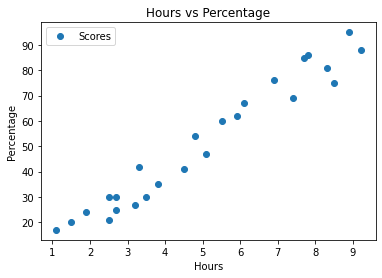

In [18]:
# plotting the distribution of scores
data.plot(x='Hours', y='Scores', style = 'o')
plt.title('Hours vs Percentage')
plt.xlabel('Hours')
plt.ylabel('Percentage')
plt.show()

#from the graph we can see that there is a positive relationship between no. of hours and percentage score

In [19]:
#to check the pairwise correlation between the variables in the dataset
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


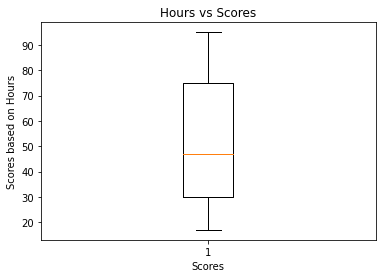

In [23]:
# Box Plot
df_scores = data['Scores']
plt.boxplot(df_scores)
plt.title('Hours vs Scores')
plt.xlabel('Scores')
plt.ylabel('Scores based on Hours')
plt.show()

# Pairing the data

In [29]:

x = data.iloc[:, :-1].values
y = data.iloc[:, 1].values 

In [31]:
print(x)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]


In [32]:
print(y)

[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


# Splitting the data

In [33]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=0) 

In [34]:
x_train

array([[3.8],
       [1.9],
       [7.8],
       [6.9],
       [1.1],
       [5.1],
       [7.7],
       [3.3],
       [8.3],
       [9.2],
       [6.1],
       [3.5],
       [2.7],
       [5.5],
       [2.7],
       [8.5],
       [2.5],
       [4.8],
       [8.9],
       [4.5]])

In [35]:
y_train

array([35, 24, 86, 76, 17, 47, 85, 42, 81, 88, 67, 30, 25, 60, 30, 75, 21,
       54, 95, 41], dtype=int64)

# Training the model

In [36]:
from sklearn.linear_model import LinearRegression 

In [37]:
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [38]:
print('Training complete')

Training complete


# Visualizing the model

In [39]:
# Plotting the regression line
line = regressor.coef_*x+regressor.intercept_


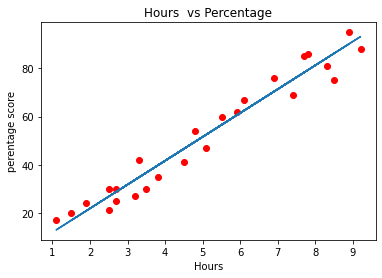

In [47]:
# Plotting for the test data
plt.scatter(x, y, color = 'red')
plt.title("Hours  vs Percentage")
plt.xlabel("Hours")
plt.ylabel("perentage score")
plt.plot(x, line);
plt.show()

# Predictions

In [48]:
# testing data in Hours
print(x_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [51]:
# predicting the score
y_pred = regressor.predict(x_test)
print(y_pred)

[16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


# compare actual vs predicted

In [54]:

final = pd.DataFrame({'Actual' : y_test, 'Predicted' : y_pred})

In [55]:
final

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


Text(0.5, 1.0, 'Actual vs Predicted')

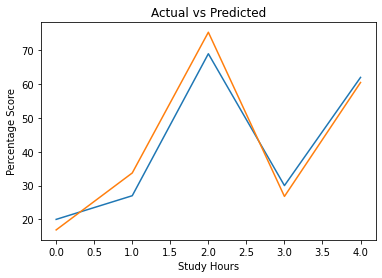

In [56]:
plt.plot(final)
plt.xlabel('Study Hours')
plt.ylabel('Percentage Score')
plt.title('Actual vs Predicted')

# predicted score for 9.25hrs/day

In [58]:
Predicted_value = regressor.predict([[9.25]])
print('prediction score for 9.25hrs/day')
Predicted_value[0]

prediction score for 9.25hrs/day


93.69173248737538

# Model Evaluation

#Now we finally evaluate the performance of the algorithm we'll use R-squared value, Mean Absolute error and Mean squared error as the accuracy measures 

In [59]:
#Evaluating the model
print('R squared value for the given model is:')
regressor.score(x_train, y_train)

R squared value for the given model is:


0.9515510725211552

In [60]:
from sklearn.metrics import mean_absolute_error
print('Mean absolute error for the given model is:',mean_absolute_error(y_test, y_pred))

Mean absolute error for the given model is: 4.183859899002975


#Mean Absolute Error - measures the absolute average distance between the real data and the predicted data

In [61]:
from sklearn.metrics import mean_squared_error
print('Mean squared Error for the given model is:', mean_squared_error(y_test, y_pred))

Mean squared Error for the given model is: 21.5987693072174


#Mean Squared Error, measures the squared average distance between the real data and predicted data

#By observing the accuracy measure value, we can conclude that the chosen regression model is a good fit for the given data set 